This is a tutorial for Python Learner.
We are going to using Python to analysis balance sheet.

In [117]:
import numpy as np
import pandas as pd

Set max rows/columns/width

In [118]:
pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns',999)
pd.set_option('display.width',1000)

Firstly, import our data

In [119]:
df=pd.read_excel("Redhat.xlsx")
df.dropna(how='all',inplace=True)
print(df)

    Data provided by SimFin                                       Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11
1   Profit & Loss statement                                              NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN         NaN         NaN
2                       NaN                                   in million USD     FY '08     FY '09     FY '10     FY '11     FY '12     FY '13     FY '14     FY '15      FY '16      FY '17
3                       NaN                                          Revenue    652.572    748.236    909.277     1133.1    1328.82    1534.62    1789.49    2052.23      2411.8     2920.46
4                       NaN                                  Cost of revenue   -106.126   -113.845   -150.287   -178.548     -200.6     -232.6   -273.199   -309.629    -354.378    -431.797
5                       NaN                            

In [120]:
index_PL=df.loc[df['Data provided by SimFin']=='Profit & Loss statement'].index[0]
print(index_PL)
index_BS=df.loc[df['Data provided by SimFin']=='Balance Sheet'].index[0]
print(index_BS)
index_CF=df.loc[df['Data provided by SimFin']=='Cash Flow statement'].index[0]
print(index_CF)

1
15
50


In [121]:
df_PL=df.iloc[index_PL:index_BS-2,1:]
df_PL

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
2,in million USD,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
3,Revenue,652.572,748.236,909.277,1133.1,1328.82,1534.62,1789.49,2052.23,2411.8,2920.46
4,Cost of revenue,-106.126,-113.845,-150.287,-178.548,-200.6,-232.6,-273.199,-309.629,-354.378,-431.797
5,Gross Profit,546.446,634.391,758.99,954.555,1128.22,1302.02,1516.29,1742.6,2057.43,2488.66
6,Operating Expenses,-463.925,-525.292,-613.314,-754.642,-924.037,-1067.56,-1266.3,-1454.55,-1725.18,-2016.22
7,Operating Income (Loss),82.521,109.099,145.676,199.913,204.18,234.46,249.994,288.048,332.245,472.442
8,Non-Operating Income (Loss),39.011,21.153,8.018,8.096,8.714,7.259,5.504,-13.183,-12.065,2.259
9,"Pretax Income (Loss), Adjusted",121.532,130.252,153.694,208.009,212.894,241.719,255.498,274.865,320.18,474.701
10,Abnormal Gains (Losses),0,-8.75,NaN,NaN,-3.142,-2.171,NaN,NaN,NaN,NaN
11,Pretax Income (Loss),121.532,121.502,153.694,208.009,209.752,239.548,255.498,274.865,320.18,474.701


In [122]:
df_PL.columns=df_PL.iloc[0]
df_PL

2,in million USD,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
2,in million USD,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
3,Revenue,652.572,748.236,909.277,1133.1,1328.82,1534.62,1789.49,2052.23,2411.8,2920.46
4,Cost of revenue,-106.126,-113.845,-150.287,-178.548,-200.6,-232.6,-273.199,-309.629,-354.378,-431.797
5,Gross Profit,546.446,634.391,758.99,954.555,1128.22,1302.02,1516.29,1742.6,2057.43,2488.66
6,Operating Expenses,-463.925,-525.292,-613.314,-754.642,-924.037,-1067.56,-1266.3,-1454.55,-1725.18,-2016.22
7,Operating Income (Loss),82.521,109.099,145.676,199.913,204.18,234.46,249.994,288.048,332.245,472.442
8,Non-Operating Income (Loss),39.011,21.153,8.018,8.096,8.714,7.259,5.504,-13.183,-12.065,2.259
9,"Pretax Income (Loss), Adjusted",121.532,130.252,153.694,208.009,212.894,241.719,255.498,274.865,320.18,474.701
10,Abnormal Gains (Losses),0,-8.75,NaN,NaN,-3.142,-2.171,NaN,NaN,NaN,NaN
11,Pretax Income (Loss),121.532,121.502,153.694,208.009,209.752,239.548,255.498,274.865,320.18,474.701


In [123]:
df_PL.set_index('in million USD',inplace=True)
df_PL

2,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
in million USD,,,,,,,,,,
in million USD,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
Revenue,652.572,748.236,909.277,1133.1,1328.82,1534.62,1789.49,2052.23,2411.8,2920.46
Cost of revenue,-106.126,-113.845,-150.287,-178.548,-200.6,-232.6,-273.199,-309.629,-354.378,-431.797
Gross Profit,546.446,634.391,758.99,954.555,1128.22,1302.02,1516.29,1742.6,2057.43,2488.66
Operating Expenses,-463.925,-525.292,-613.314,-754.642,-924.037,-1067.56,-1266.3,-1454.55,-1725.18,-2016.22
Operating Income (Loss),82.521,109.099,145.676,199.913,204.18,234.46,249.994,288.048,332.245,472.442
Non-Operating Income (Loss),39.011,21.153,8.018,8.096,8.714,7.259,5.504,-13.183,-12.065,2.259
"Pretax Income (Loss), Adjusted",121.532,130.252,153.694,208.009,212.894,241.719,255.498,274.865,320.18,474.701
Abnormal Gains (Losses),0,-8.75,NaN,NaN,-3.142,-2.171,NaN,NaN,NaN,NaN


In [124]:
df_PL.fillna(0,inplace=True)
df_PL

2,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
in million USD,,,,,,,,,,
in million USD,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
Revenue,652.572,748.236,909.277,1133.1,1328.82,1534.62,1789.49,2052.23,2411.8,2920.46
Cost of revenue,-106.126,-113.845,-150.287,-178.548,-200.6,-232.6,-273.199,-309.629,-354.378,-431.797
Gross Profit,546.446,634.391,758.99,954.555,1128.22,1302.02,1516.29,1742.6,2057.43,2488.66
Operating Expenses,-463.925,-525.292,-613.314,-754.642,-924.037,-1067.56,-1266.3,-1454.55,-1725.18,-2016.22
Operating Income (Loss),82.521,109.099,145.676,199.913,204.18,234.46,249.994,288.048,332.245,472.442
Non-Operating Income (Loss),39.011,21.153,8.018,8.096,8.714,7.259,5.504,-13.183,-12.065,2.259
"Pretax Income (Loss), Adjusted",121.532,130.252,153.694,208.009,212.894,241.719,255.498,274.865,320.18,474.701
Abnormal Gains (Losses),0,-8.75,0,0,-3.142,-2.171,0,0,0,0


In [125]:
df_PL=df_PL[1:]
df_PL

2,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
in million USD,,,,,,,,,,
Revenue,652.572,748.236,909.277,1133.1,1328.82,1534.62,1789.49,2052.23,2411.8,2920.46
Cost of revenue,-106.126,-113.845,-150.287,-178.548,-200.6,-232.6,-273.199,-309.629,-354.378,-431.797
Gross Profit,546.446,634.391,758.99,954.555,1128.22,1302.02,1516.29,1742.6,2057.43,2488.66
Operating Expenses,-463.925,-525.292,-613.314,-754.642,-924.037,-1067.56,-1266.3,-1454.55,-1725.18,-2016.22
Operating Income (Loss),82.521,109.099,145.676,199.913,204.18,234.46,249.994,288.048,332.245,472.442
Non-Operating Income (Loss),39.011,21.153,8.018,8.096,8.714,7.259,5.504,-13.183,-12.065,2.259
"Pretax Income (Loss), Adjusted",121.532,130.252,153.694,208.009,212.894,241.719,255.498,274.865,320.18,474.701
Abnormal Gains (Losses),0,-8.75,0,0,-3.142,-2.171,0,0,0,0
Pretax Income (Loss),121.532,121.502,153.694,208.009,209.752,239.548,255.498,274.865,320.18,474.701


In [126]:
df_BS=df.iloc[index_BS-1:index_CF-3, 1:]
df_BS

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
16,in million USD,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
17,Assets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,"Cash, Cash Equivalents & Short Term Investments",NaN,760.774,860.6,813.515,879.465,982.129,1262.73,1208.92,1460.79,2042.49
19,Accounts & Notes Receivable,NaN,139.436,184.741,255.18,302.942,360.594,468.021,509.715,634.821,806.744
20,Other Short Term Assets,NaN,44.958,63.497,82.895,97.577,120.195,152.695,153.798,220.09,292.863
21,Total Current Assets,NaN,945.168,1108.84,1151.59,1279.98,1462.92,1883.44,1872.43,2315.7,3142.1
22,"Property, Plant & Equipment, Net",NaN,71.708,75.558,92.065,141.586,173.917,172.151,166.886,189.629,206.105
23,Long Term Investments & Receivables,NaN,209.411,331.791,446.838,438.908,505.3,546.016,786.47,672.44,430.442
24,Other Long Term Assets,NaN,644.585,683.135,800.606,953.182,964.484,1182.96,1329.31,1357.41,1695.85
25,Total Noncurrent Assets,NaN,925.704,1090.48,1339.51,1533.68,1643.7,1901.13,2282.67,2219.48,2332.4


In [127]:
df_BS.columns=df_BS.iloc[0]
df_BS

16,in million USD,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
16,in million USD,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
17,Assets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,"Cash, Cash Equivalents & Short Term Investments",NaN,760.774,860.6,813.515,879.465,982.129,1262.73,1208.92,1460.79,2042.49
19,Accounts & Notes Receivable,NaN,139.436,184.741,255.18,302.942,360.594,468.021,509.715,634.821,806.744
20,Other Short Term Assets,NaN,44.958,63.497,82.895,97.577,120.195,152.695,153.798,220.09,292.863
21,Total Current Assets,NaN,945.168,1108.84,1151.59,1279.98,1462.92,1883.44,1872.43,2315.7,3142.1
22,"Property, Plant & Equipment, Net",NaN,71.708,75.558,92.065,141.586,173.917,172.151,166.886,189.629,206.105
23,Long Term Investments & Receivables,NaN,209.411,331.791,446.838,438.908,505.3,546.016,786.47,672.44,430.442
24,Other Long Term Assets,NaN,644.585,683.135,800.606,953.182,964.484,1182.96,1329.31,1357.41,1695.85
25,Total Noncurrent Assets,NaN,925.704,1090.48,1339.51,1533.68,1643.7,1901.13,2282.67,2219.48,2332.4


In [128]:
df_BS.set_index('in million USD',inplace=True)
df_BS

16,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
in million USD,,,,,,,,,,
in million USD,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
Assets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Cash, Cash Equivalents & Short Term Investments",NaN,760.774,860.6,813.515,879.465,982.129,1262.73,1208.92,1460.79,2042.49
Accounts & Notes Receivable,NaN,139.436,184.741,255.18,302.942,360.594,468.021,509.715,634.821,806.744
Other Short Term Assets,NaN,44.958,63.497,82.895,97.577,120.195,152.695,153.798,220.09,292.863
Total Current Assets,NaN,945.168,1108.84,1151.59,1279.98,1462.92,1883.44,1872.43,2315.7,3142.1
"Property, Plant & Equipment, Net",NaN,71.708,75.558,92.065,141.586,173.917,172.151,166.886,189.629,206.105
Long Term Investments & Receivables,NaN,209.411,331.791,446.838,438.908,505.3,546.016,786.47,672.44,430.442
Other Long Term Assets,NaN,644.585,683.135,800.606,953.182,964.484,1182.96,1329.31,1357.41,1695.85


In [129]:
df_BS.fillna(0,inplace=True)
df_BS

16,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
in million USD,,,,,,,,,,
in million USD,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
Assets,0,0,0,0,0,0,0,0,0,0
"Cash, Cash Equivalents & Short Term Investments",0,760.774,860.6,813.515,879.465,982.129,1262.73,1208.92,1460.79,2042.49
Accounts & Notes Receivable,0,139.436,184.741,255.18,302.942,360.594,468.021,509.715,634.821,806.744
Other Short Term Assets,0,44.958,63.497,82.895,97.577,120.195,152.695,153.798,220.09,292.863
Total Current Assets,0,945.168,1108.84,1151.59,1279.98,1462.92,1883.44,1872.43,2315.7,3142.1
"Property, Plant & Equipment, Net",0,71.708,75.558,92.065,141.586,173.917,172.151,166.886,189.629,206.105
Long Term Investments & Receivables,0,209.411,331.791,446.838,438.908,505.3,546.016,786.47,672.44,430.442
Other Long Term Assets,0,644.585,683.135,800.606,953.182,964.484,1182.96,1329.31,1357.41,1695.85


In [130]:
df_BS[1:]

16,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
in million USD,,,,,,,,,,
Assets,0,0,0,0,0,0,0,0,0,0
"Cash, Cash Equivalents & Short Term Investments",0,760.774,860.6,813.515,879.465,982.129,1262.73,1208.92,1460.79,2042.49
Accounts & Notes Receivable,0,139.436,184.741,255.18,302.942,360.594,468.021,509.715,634.821,806.744
Other Short Term Assets,0,44.958,63.497,82.895,97.577,120.195,152.695,153.798,220.09,292.863
Total Current Assets,0,945.168,1108.84,1151.59,1279.98,1462.92,1883.44,1872.43,2315.7,3142.1
"Property, Plant & Equipment, Net",0,71.708,75.558,92.065,141.586,173.917,172.151,166.886,189.629,206.105
Long Term Investments & Receivables,0,209.411,331.791,446.838,438.908,505.3,546.016,786.47,672.44,430.442
Other Long Term Assets,0,644.585,683.135,800.606,953.182,964.484,1182.96,1329.31,1357.41,1695.85
Total Noncurrent Assets,0,925.704,1090.48,1339.51,1533.68,1643.7,1901.13,2282.67,2219.48,2332.4


In [131]:
df_BS=df_BS[1:]
df_BS

16,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
in million USD,,,,,,,,,,
Assets,0,0,0,0,0,0,0,0,0,0
"Cash, Cash Equivalents & Short Term Investments",0,760.774,860.6,813.515,879.465,982.129,1262.73,1208.92,1460.79,2042.49
Accounts & Notes Receivable,0,139.436,184.741,255.18,302.942,360.594,468.021,509.715,634.821,806.744
Other Short Term Assets,0,44.958,63.497,82.895,97.577,120.195,152.695,153.798,220.09,292.863
Total Current Assets,0,945.168,1108.84,1151.59,1279.98,1462.92,1883.44,1872.43,2315.7,3142.1
"Property, Plant & Equipment, Net",0,71.708,75.558,92.065,141.586,173.917,172.151,166.886,189.629,206.105
Long Term Investments & Receivables,0,209.411,331.791,446.838,438.908,505.3,546.016,786.47,672.44,430.442
Other Long Term Assets,0,644.585,683.135,800.606,953.182,964.484,1182.96,1329.31,1357.41,1695.85
Total Noncurrent Assets,0,925.704,1090.48,1339.51,1533.68,1643.7,1901.13,2282.67,2219.48,2332.4


In [132]:
df_CF=df.iloc[index_CF-2:,1:]
df_CF.columns=df_CF.iloc[0]
df_CF.set_index('in million USD',inplace=True)
df_CF=df_CF[1:]
df_CF.fillna(0,inplace=True)

In [133]:
df_CF

51,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
in million USD,,,,,,,,,,
Net Income/Starting Line,78.721,87.253,107.278,146.626,150.204,178.292,180.201,199.365,253.703,258.803
Depreciation & Amortization,40.309,45.861,47.997,51.372,62.341,74.405,76.263,76.088,85.309,97.138
Non-Cash Items,31.593,21.947,56.285,100.370,108.591,137.658,178.423,210.382,240.117,192.640
Change in Working Capital,85.816,100.188,79.188,93.515,144.161,150.225,193.515,250.488,204.588,374.557
Cash from Operating Activities,236.439,255.249,290.748,391.883,465.297,540.580,628.402,736.323,783.717,923.138
Change in Fixed Assets & Intangibles,-28.417,-33.112,-46.852,-51.618,-120.038,-97.559,-51.771,-55.517,-80.897,-101.687
Net Change in Long Term Investment,322.773,-241.323,19.440,-171.389,-134.127,-8.619,11.607,-327.313,0.134,325.899
Net Cash From Acquisitions & Divestitures,-148.140,0.000,-31.381,-135.210,-135.501,0.000,-296.121,-125.709,-28.667,-300.877
Other Investing Activities,0.000,-1.768,3.938,-0.643,0.617,-2.084,11.282,-3.569,-0.703,-0.189


In [134]:
df_PL.to_pickle("RedHat_PL.pkl")
df_BS.to_pickle("RedHat_BS.pkl")
df_CF.to_pickle("RedHat_CF.pkl")

In [135]:
%matplotlib inline

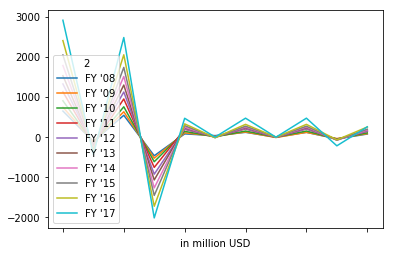

In [136]:
df_PL.plot()

In [137]:
df_PL

2,FY '08,FY '09,FY '10,FY '11,FY '12,FY '13,FY '14,FY '15,FY '16,FY '17
in million USD,,,,,,,,,,
Revenue,652.572,748.236,909.277,1133.1,1328.82,1534.62,1789.49,2052.23,2411.8,2920.46
Cost of revenue,-106.126,-113.845,-150.287,-178.548,-200.6,-232.6,-273.199,-309.629,-354.378,-431.797
Gross Profit,546.446,634.391,758.99,954.555,1128.22,1302.02,1516.29,1742.6,2057.43,2488.66
Operating Expenses,-463.925,-525.292,-613.314,-754.642,-924.037,-1067.56,-1266.3,-1454.55,-1725.18,-2016.22
Operating Income (Loss),82.521,109.099,145.676,199.913,204.18,234.46,249.994,288.048,332.245,472.442
Non-Operating Income (Loss),39.011,21.153,8.018,8.096,8.714,7.259,5.504,-13.183,-12.065,2.259
"Pretax Income (Loss), Adjusted",121.532,130.252,153.694,208.009,212.894,241.719,255.498,274.865,320.18,474.701
Abnormal Gains (Losses),0,-8.75,0,0,-3.142,-2.171,0,0,0,0
Pretax Income (Loss),121.532,121.502,153.694,208.009,209.752,239.548,255.498,274.865,320.18,474.701


In [138]:
df_PL=df_PL.T
df_PL

in million USD,Revenue,Cost of revenue,Gross Profit,Operating Expenses,Operating Income (Loss),Non-Operating Income (Loss),"Pretax Income (Loss), Adjusted",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, net",Net Income Available to Common Shareholders
2,,,,,,,,,,,
FY '08,652.572,-106.126,546.446,-463.925,82.521,39.011,121.532,0,121.532,-42.811,78.721
FY '09,748.236,-113.845,634.391,-525.292,109.099,21.153,130.252,-8.75,121.502,-34.249,87.253
FY '10,909.277,-150.287,758.99,-613.314,145.676,8.018,153.694,0,153.694,-46.416,107.278
FY '11,1133.1,-178.548,954.555,-754.642,199.913,8.096,208.009,0,208.009,-61.383,146.626
FY '12,1328.82,-200.6,1128.22,-924.037,204.18,8.714,212.894,-3.142,209.752,-59.548,150.204
FY '13,1534.62,-232.6,1302.02,-1067.56,234.46,7.259,241.719,-2.171,239.548,-61.256,178.292
FY '14,1789.49,-273.199,1516.29,-1266.3,249.994,5.504,255.498,0,255.498,-75.297,180.201
FY '15,2052.23,-309.629,1742.6,-1454.55,288.048,-13.183,274.865,0,274.865,-75.5,199.365
FY '16,2411.8,-354.378,2057.43,-1725.18,332.245,-12.065,320.18,0,320.18,-66.477,253.703


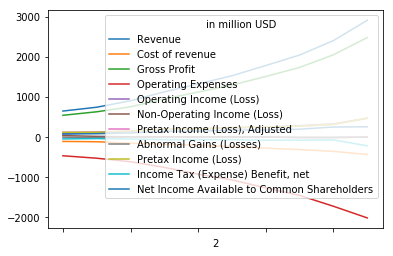

In [139]:
df_PL.plot()


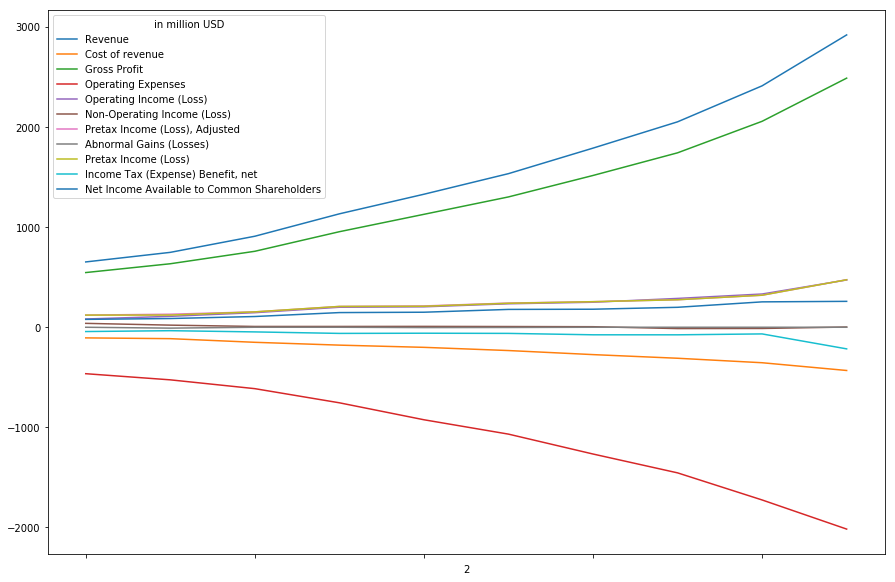

In [143]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,10]
df_PL.plot()